<a href="https://colab.research.google.com/github/spdzh/NLP-PROJECT/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib as plt

# Data Prepration

Import data

In [2]:
datasetp=pd.read_csv("processedPositive.csv")
datasetn=pd.read_csv("processedNegative.csv")

Removing stop words

In [3]:
""" 
All cleaning processes such as changing to lower case, split ssentences to words, 
removing punctuations and... are done in this section.
"""
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words= set(stopwords.words('english'))

#For Negative Comment
w=[]

for j in range(1,len(datasetn.count())):
    if (pd.isna(datasetn['%i'%j][0])==False):
        review=datasetn['%i'%j][0]
        review= review.lower()   # Lowercase
        review= review.split()   # split to words
        table = str.maketrans('', '', string.punctuation)   # Remove puncutations
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]   # Remove empty words
        review= [word for word in review if word not in stop_words]   # Remove stopwords
        porter = PorterStemmer()   # word stemming
        review = [porter.stem(word) for word in review]
        review= ' '.join(review)  # Join the words and make the phrase
        w.append(review)

#For Positive Comments
v=[]

for j in range(1,len(datasetp.count())):
    if (pd.isna(datasetp['%i'%j][0])==False):
        review=datasetp['%i'%j][0]
        review= review.lower()
        review= review.split()
        table = str.maketrans('', '', string.punctuation)
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]
        review= [word for word in review if word not in stop_words]
        porter = PorterStemmer()
        review = [porter.stem(word) for word in review]
        review= ' '.join(review)
        v.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**Bag of Words Model (Text Classification)**

In [4]:
# Bag Of Words Model
x=np.concatenate((w,v), axis=0)
y=np.concatenate((np.ones(len(w)),np.zeros(len(v))),axis=0)
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
X= cv.fit_transform(x).toarray()
print(len(X[0]))

1500


Splitting data to train set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=0)

# Fitting Different Models

1. Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Prediction

In [ ]:
y_pred_NB= classifier_NB.predict(X_test)
print(np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)),1))

2. Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifier_DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Prediction

In [ ]:
y_pred_DT= classifier_DT.predict(X_test)
print(np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))

3. Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Prediction

In [ ]:
y_pred_RF= classifier_RF.predict(X_test)
print(np.concatenate((y_pred_RF.reshape(len(y_pred_RF),1), y_test.reshape(len(y_test),1)),1))

# Confusion Matrix and comparing factors (Accuracy, Precision, recall, F1 Score)

1. Naive Bayes

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_NB= confusion_matrix(y_test, y_pred_NB)
print(cm_NB)

[[187  40]
 [ 39 194]]


In [13]:
TP_NB = 187 #True Positives 
TN_NB = 194 #True Negatives 
FP_NB = 40 #False Positives 
FN_NB = 39 #False Negatives

# Accuracy
accuracy_NB= accuracy_score(y_test, y_pred_NB)
print(accuracy_NB)

# Precision
Precision_NB = TP_NB / (TP_NB + FP_NB)
print(Precision_NB)

# Recall
Recall_NB = TP_NB / (TP_NB + FN_NB)
print(Recall_NB)

# F1-Score
F1_Score_NB = 2 * Precision_NB * Recall_NB / (Precision_NB + Recall_NB)
print(F1_Score_NB)

0.8282608695652174
0.8237885462555066
0.827433628318584
0.8256070640176602


2. Decision Tree

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_DT= confusion_matrix(y_test, y_pred_DT)
print(cm_DT)

[[213  14]
 [ 29 204]]


In [15]:
TP_DT = 213 #True Positives 
TN_DT = 204 #True Negatives 
FP_DT = 14 #False Positives 
FN_DT = 29 #False Negatives

# Accuracy
accuracy_DT= accuracy_score(y_test, y_pred_DT)
print(accuracy_DT)

# Precision
Precision_DT = TP_DT / (TP_DT + FP_DT)
print(Precision_DT)

# Recall
Recall_DT = TP_DT / (TP_DT + FN_DT)
print(Recall_DT)

# F1-Score
F1_Score_DT = 2 * Precision_DT * Recall_DT / (Precision_DT + Recall_DT)
print(F1_Score_DT)

0.9065217391304348
0.9383259911894273
0.8801652892561983
0.9083155650319829


3. Random Forest

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RF= confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

[[205  22]
 [ 19 214]]


In [17]:
TP_RF = 205 #True Positives 
TN_RF = 214 #True Negatives 
FP_RF = 22 #False Positives 
FN_RF = 19 #False Negatives

# Accuracy
accuracy_RF= accuracy_score(y_test, y_pred_RF)
print(accuracy_RF)

# Precision
Precision_RF = TP_RF / (TP_RF + FP_RF)
print(Precision_RF)

# Recall
Recall_RF = TP_RF / (TP_RF + FN_RF)
print(Recall_RF)

# F1-Score
F1_Score_RF = 2 * Precision_RF * Recall_RF / (Precision_RF + Recall_RF)
print(F1_Score_RF)

0.9108695652173913
0.9030837004405287
0.9151785714285714
0.9090909090909092


# Comparison by Vizualizing




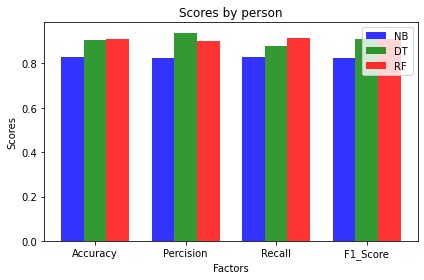

In [18]:
# data to plot
n_groups = 4
NB = (accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB)
DT = (accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT)
RF = (accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF)


# create plot
fig, ax = plt.pyplot.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.pyplot.bar(index, NB, bar_width,
                    alpha=opacity,
                    color='b',
                    label='NB')

rects2 = plt.pyplot.bar(index + bar_width, DT, bar_width,
                    alpha=opacity,
                    color='g',
                    label='DT')

rects3 = plt.pyplot.bar(index + 2*bar_width, RF, bar_width,
                    alpha=opacity,
                    color='r',
                    label='RF')


plt.pyplot.xlabel('Factors')
plt.pyplot.ylabel('Scores')
plt.pyplot.title('Scores by person')
plt.pyplot.xticks(index + bar_width, ('Accuracy', 'Percision', 'Recall', 'F1_Score'))
plt.pyplot.legend()

plt.pyplot.tight_layout()
plt.pyplot.show()

# **Latent Dirichlet Allocation (LDA) (Topic Modeling)**

Data prepration

In [ ]:
""" 
All cleaning processes such as changing to lower case, split ssentences to words, 
removing punctuations and... are done in this section.
"""
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words= set(stopwords.words('english'))

#For Negative Comment
w=[]

for j in range(1,len(datasetn.count())):
    if (pd.isna(datasetn['%i'%j][0])==False):
        review=datasetn['%i'%j][0]
        review= review.lower()   # Lowercase
        review= review.split()   # split to words
        table = str.maketrans('', '', string.punctuation)   # Remove puncutations
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]   # Remove empty words
        review= ' '.join(review)  # Join the words and make the phrase
        w.append(review)

#For Positive Comments
v=[]

for j in range(1,len(datasetp.count())):
    if (pd.isna(datasetp['%i'%j][0])==False):
        review=datasetp['%i'%j][0]
        review= review.lower()
        review= review.split()
        table = str.maketrans('', '', string.punctuation)
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]
        review= ' '.join(review)
        v.append(review)

x=np.concatenate((w,v), axis=0)
x=','.join(x)
print(x)

Word Cloud

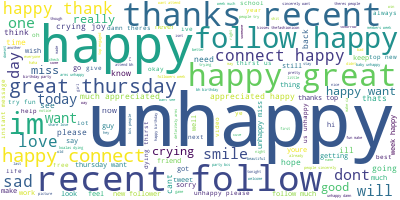

In [20]:
# Import the wordcloud library.
from wordcloud import WordCloud

# Creat a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=3000, contour_width=3, contour_color='steelred')

# Generate a word cloud
wordcloud.generate(x)

# Visualize the generated word cloud
wordcloud.to_image()

Preparing data for LDA

In [21]:
""" 
All cleaning processes such as changing to lower case, split ssentences to words, 
removing punctuations and... are done in this section.
"""
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words= set(stopwords.words('english'))

#For Negative Comment
w=[]

for j in range(1,len(datasetn.count())):
    if (pd.isna(datasetn['%i'%j][0])==False):
        review=datasetn['%i'%j][0]
        review= review.lower()   # Lowercase
        review= review.split()   # split to words
        table = str.maketrans('', '', string.punctuation)   # Remove puncutations
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]   # Remove empty words
        w.append(review)

#For Positive Comments
v=[]

for j in range(1,len(datasetp.count())):
    if (pd.isna(datasetp['%i'%j][0])==False):
        review=datasetp['%i'%j][0]
        review= review.lower()
        review= review.split()
        table = str.maketrans('', '', string.punctuation)
        review= [j.translate(table) for j in review]
        review= [word for word in review if word.isalpha()]
        v.append(review)

x=np.concatenate((w,v), axis=0)
x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([list(['how', 'unhappy', 'some', 'dogs', 'like', 'it', 'though']),
       list(['talking', 'to', 'my', 'over', 'driver', 'about', 'where', 'im', 'goinghe', 'said', 'hed', 'love', 'to', 'go', 'to', 'new', 'york', 'too', 'but', 'since', 'trump', 'its', 'probably', 'not']),
       list(['does', 'anybody', 'know', 'if', 'the', 'rands', 'likely', 'to', 'fall', 'against', 'the', 'dollar', 'i', 'got', 'some', 'money', 'i', 'need', 'to', 'change', 'into', 'r', 'but', 'it', 'keeps', 'getting', 'stronger', 'unhappy']),
       ..., list(['name']),
       list(['ngam', 'to', 'weeks', 'left', 'for', 'cadet', 'pilot', 'exam', 'crying', 'with', 'joy']),
       list(['great', 'youre', 'welcome', 'josh', 'happy', 'adam'])],
      dtype=object)

In [22]:
""" Change to dict and corpus """

import gensim.corpora as corpora

# Create dictionary
word2dic = corpora.Dictionary(x)

# Creat Corpus
corpus = [word2dic.doc2bow(text) for text in x]

print(corpus[10])

[(6, 1), (80, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)]


LDA Model Training

In [23]:
import gensim
from pprint import pprint 

# Number of Topics
topics_num = 5

#Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word=word2dic,
                                       num_topics= topics_num)

# Print the keywords in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"the" + 0.022*"i" + 0.015*"to" + 0.014*"happy" + 0.014*"in" + '
  '0.013*"is" + 0.013*"with" + 0.012*"crying" + 0.011*"joy" + 0.011*"of"'),
 (1,
  '0.039*"happy" + 0.029*"for" + 0.026*"i" + 0.024*"you" + 0.023*"a" + '
  '0.023*"to" + 0.022*"this" + 0.020*"the" + 0.016*"much" + 0.014*"thanks"'),
 (2,
  '0.085*"happy" + 0.033*"the" + 0.033*"to" + 0.031*"for" + 0.028*"a" + '
  '0.025*"thanks" + 0.022*"have" + 0.021*"follow" + 0.019*"great" + '
  '0.018*"recent"'),
 (3,
  '0.054*"happy" + 0.026*"the" + 0.025*"a" + 0.021*"to" + 0.012*"for" + '
  '0.012*"have" + 0.012*"it" + 0.010*"im" + 0.010*"unhappy" + 0.009*"great"'),
 (4,
  '0.029*"happy" + 0.024*"i" + 0.022*"to" + 0.020*"d" + 0.018*"unhappy" + '
  '0.013*"this" + 0.012*"for" + 0.010*"the" + 0.010*"a" + 0.009*"as"')]


Visualization

In [24]:
""" Visualizing 5 topics """

###!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle 
import pyLDAvis

vis = gensimvis.prepare(lda_model, corpus, word2dic)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.011809 -0.082780       1        1  33.895200
2      0.100767 -0.032278       2        1  20.459715
3      0.038068  0.090793       3        1  15.924414
0     -0.132894 -0.010461       4        1  15.166221
4     -0.017750  0.034726       5        1  14.554450, topic_info=         Term         Freq        Total Category  logprob  loglift
453     happy  1013.000000  1013.000000  Default  30.0000  30.0000
941    thanks   269.000000   269.000000  Default  29.0000  29.0000
530         d   153.000000   153.000000  Default  28.0000  28.0000
140    crying    77.000000    77.000000  Default  27.0000  27.0000
2470  connect   119.000000   119.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
184    really    13.616167    62.728275   Topic5  -5.4659   0.3997
906     great    15.106048   213.994208   Topic5  -5.3620  -0.7236
1188   follow    14.803932   190.729541   Topic5  -5.3823  -0.6287
147        of    14.583177   181.177556   Topic5  -5.3973  -0.5923
2442   recent    13.824576   159.485234   Topic5  -5.4507  -0.5182

[387 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
54        1  0.403038      a
54        2  0.292491      a
54        3  0.204974      a
54        4  0.027637      a
54        5  0.073698      a
...     ...       ...    ...
88        1  0.085410  youre
88        2  0.085410  youre
88        3  0.683278  youre
88        4  0.085410  youre
88        5  0.085410  youre

[638 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1, 5])